In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from pyke.prf import SimpleKeplerPRF

/Users/ozymandias1/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
prf = SimpleKeplerPRF(channel=16, shape=(11, 11), column=250, row=200)

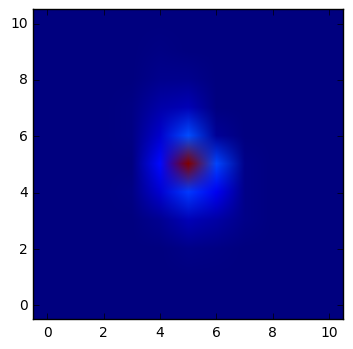

In [4]:
plt.imshow(prf(flux=1e4, center_col=255.5, center_row=205.5), origin='lower')

In [5]:
import numpy as np
from scipy import signal

In [6]:
cadences = np.arange(1000)

In [7]:
A = 1e4 + 1e2 * np.sin(2 * np.pi * np.linspace(0, 6, 1000)) + 300 * np.linspace(0, 1, 1000)
xc = 255.5 + 0.05 * np.random.normal(size=1000) + .3*signal.sawtooth(np.linspace(0, 100, 1000))
yc = 205.5 + 0.05 * np.random.normal(size=1000) + .3 - .3*signal.sawtooth(np.linspace(0, 100, 1000))

In [8]:
tpf = np.array([np.random.poisson(prf(flux=A[i], center_col=xc[i], center_row=yc[i]) + 3) for i in range(1000)])

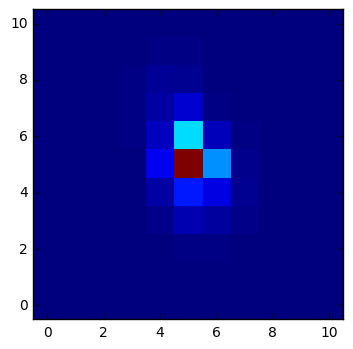

In [22]:
plt.imshow(tpf[100], origin='lower', interpolation='nearest')

In [10]:
lc = np.sum(tpf, axis=(1,2))

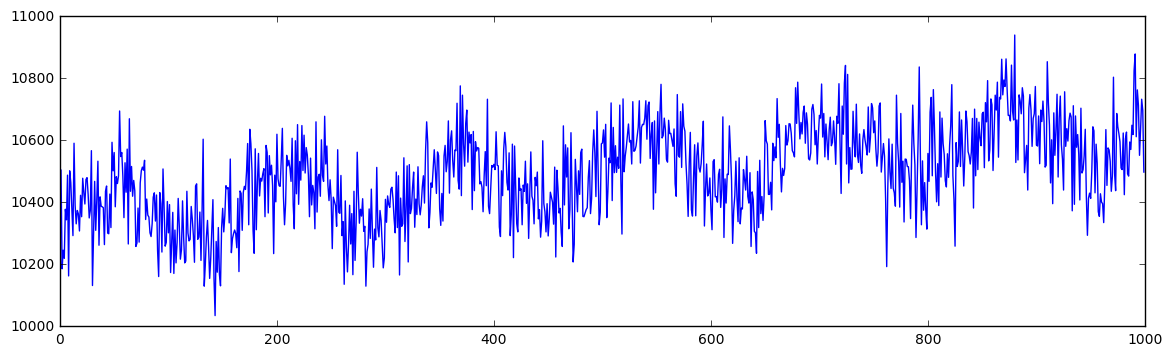

In [11]:
plt.figure(figsize=[14, 4])
plt.plot(cadences, lc)

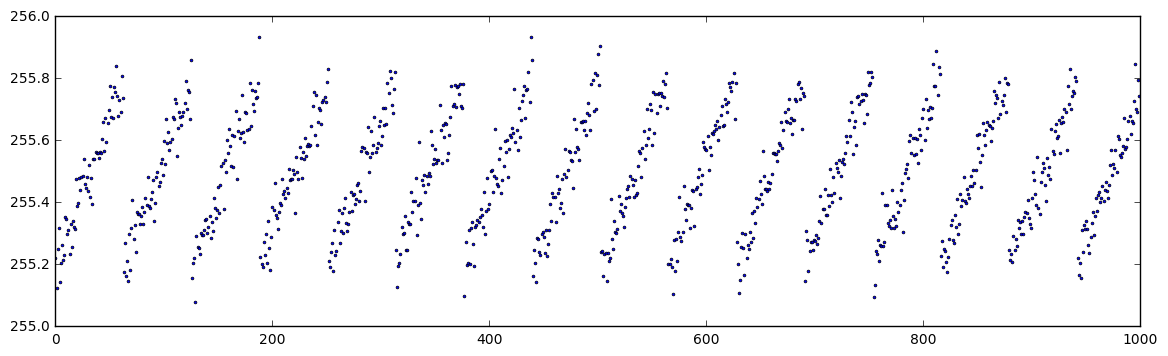

In [12]:
plt.figure(figsize=[14, 4])
plt.plot(cadences, xc, 'o', markersize=2)

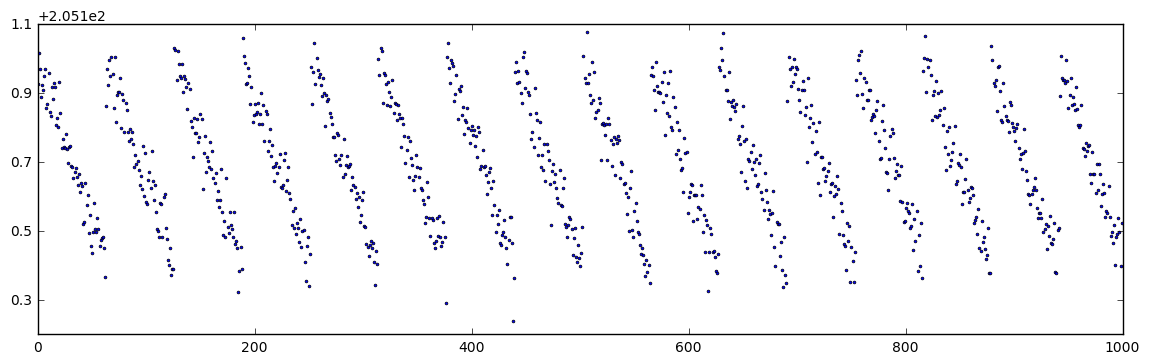

In [13]:
plt.figure(figsize=[14, 4])
plt.plot(cadences, yc, 'o', markersize=2)

In [14]:
from pyke.prf import PRFPhotometry

In [15]:
from oktopus.models import IntegratedSymmetricGaussian2D

In [16]:
from oktopus.prior import UniformPrior

In [17]:
y, x = np.indices(prf.shape) + 0.5

In [18]:
x = x + 250
y = y + 200

In [19]:
psf = IntegratedSymmetricGaussian2D(x, y)

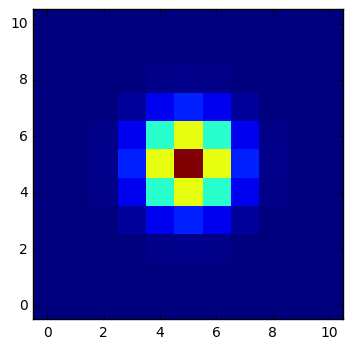

In [21]:
plt.imshow(psf(1000, 255.5, 205.5, 1), origin='lower', interpolation='nearest')

In [23]:
prior = UniformPrior(lb=[5e3, 253.5, 203.5, .25],
                     ub=[15e3, 257.5, 207.5, 1.25])

In [24]:
phot_poisson = PRFPhotometry(scene_model=psf, prior=prior)

In [25]:
results_poisson = phot_poisson.fit(tpf_flux=tpf)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/ozymandias1/anaconda2/envs/python3/lib/python3.5/site-packages/autograd-1.1.13-py3.5.egg/autograd/core.py:81: RuntimeWarning: divide by zero encountered in log
  result_value = self.fun(*argvals, **kwargs)
/Users/ozymandias1/anaconda2/envs/python3/lib/python3.5/site-packages/oktopus-0.1.dev12-py3.5.egg/oktopus/likelihood.py:247: RuntimeWarning: invalid value encountered in multiply
/Users/ozymandias1/anaconda2/envs/python3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1876: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/ozymandias1/anaconda2/envs/python3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1877: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
100%|██████████| 1000/1000 [00:11<00:00, 86.39it/s]


In [26]:
flux = results_poisson[:, 0]
xcenter = results_poisson[:, 1]
ycenter = results_poisson[:, 2]
shape = results_poisson[:, 3]

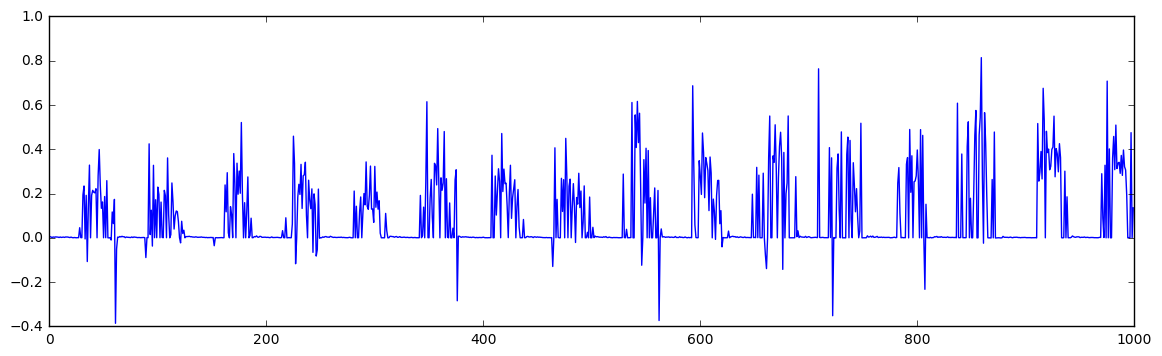

In [27]:
plt.figure(figsize=[14, 4])
plt.plot(cadences, flux - lc)

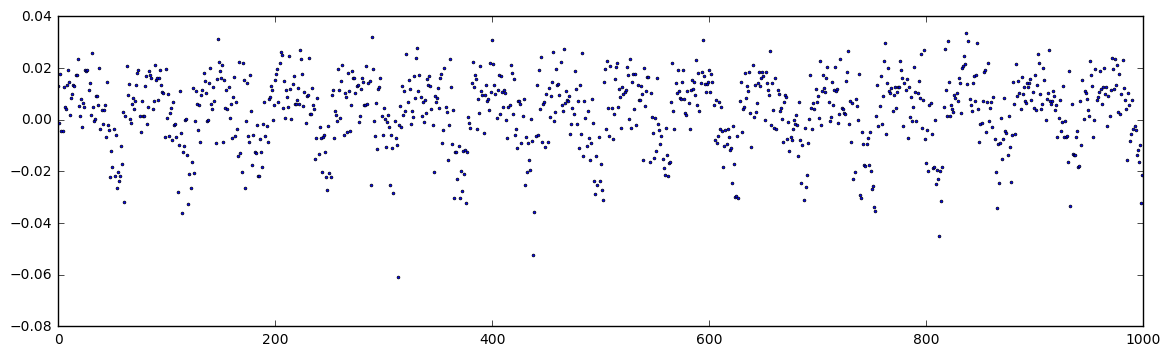

In [28]:
plt.figure(figsize=[14, 4])
plt.plot(cadences, xcenter - xc, 'o', markersize=2)

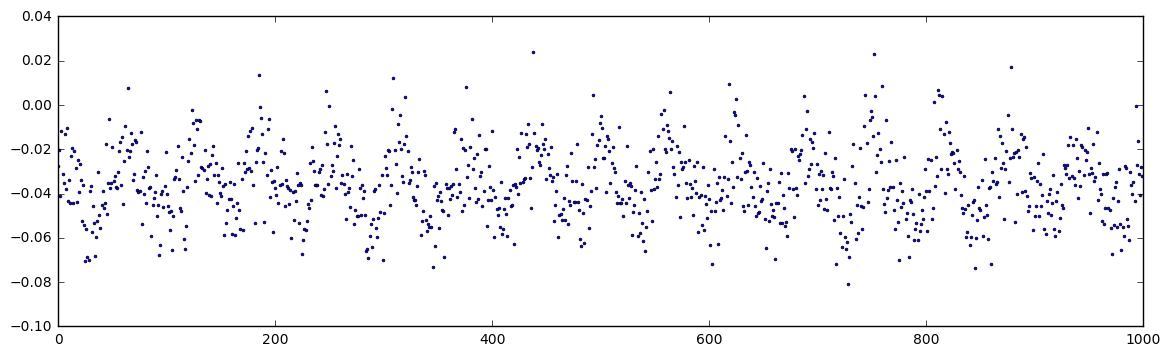

In [29]:
plt.figure(figsize=[14, 4])
plt.plot(cadences, ycenter - yc, 'o', markersize=2)

In [30]:
from oktopus import GaussianPosterior

In [31]:
phot_gauss = PRFPhotometry(scene_model=psf, prior=prior, loss_function=GaussianPosterior, var=1.)

In [32]:
results_gauss = phot_gauss.fit(tpf_flux=tpf)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/ozymandias1/anaconda2/envs/python3/lib/python3.5/site-packages/scipy/optimize/optimize.py:1876: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
100%|██████████| 1000/1000 [00:22<00:00, 44.07it/s]


In [33]:
flux = results_gauss[:, 0]
xcenter = results_gauss[:, 1]
ycenter = results_gauss[:, 2]
shape = results_gauss[:, 3]

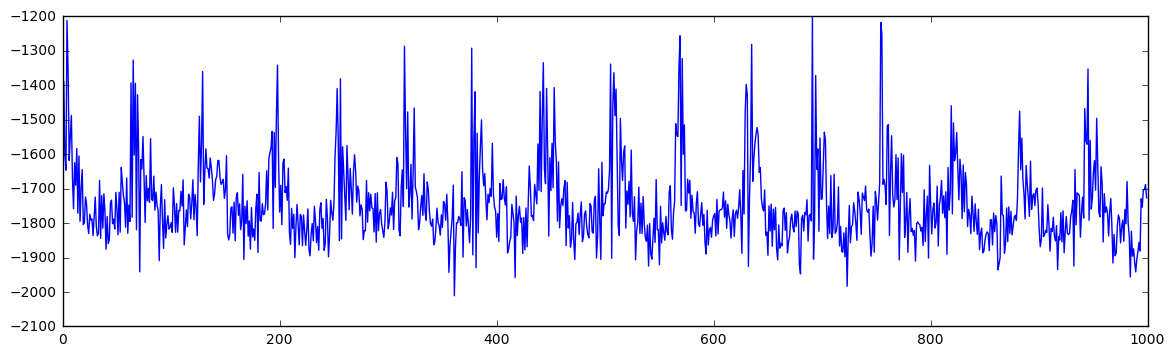

In [34]:
plt.figure(figsize=[14, 4])
plt.plot(cadences, flux - lc)

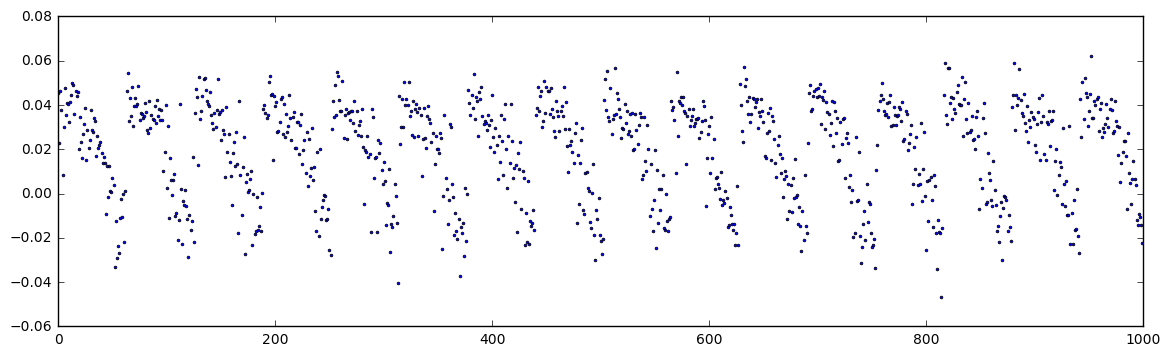

In [35]:
plt.figure(figsize=[14, 4])
plt.plot(cadences, xcenter - xc, 'o', markersize=2)

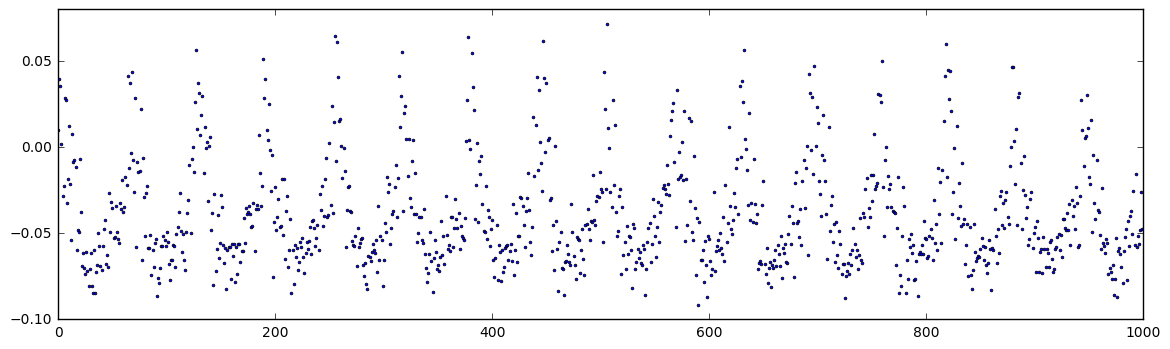

In [36]:
plt.figure(figsize=[14, 4])
plt.plot(cadences, ycenter - yc, 'o', markersize=2)

In [57]:
def detector():
    """
    Returns
    -------
    det : ndarray
        Returns the log of the pixel flat-field.
        Each position (x, y) corresponds to a parameter
        that will be improved (fitted).
    """
    
    return np.zeros((44, 44))

In [ ]:
def improve_detector():

In [38]:
def star_model(pix_series):
    xc, yc = compute_centroid(pix_series) # [xc]: n_cadences
    # interpolate ("put the data in a finer grid") for each cadence
    # return the evaluation (median or mean) for all cadences

In [ ]:
def improve_star_model():

In [ ]:
def lnlikelihood():
    """
    Returns
    -------
        lnlike, grad_lnlike
    """

In [39]:
import numpy as np

In [40]:
x = np.linspace(0, 10, 11)

In [41]:
y = np.linspace(0, 10, 11)

In [42]:
xp = np.linspace(0, 10, 44)
yp = np.linspace(0, 10, 44)

In [43]:
from scipy.interpolate import RectBivariateSpline

In [44]:
tpf += 1

In [45]:
tpf = np.log(tpf)

In [46]:
interp = [RectBivariateSpline(x, y, tpf[i], kx=1, ky=1) for i in range(tpf.shape[0])]

In [47]:
super_tpf = np.array([interp[i](yp + (yc[i] - 205.5), xp + (xc[i] - 255.5)) for i in range(len(xc))])

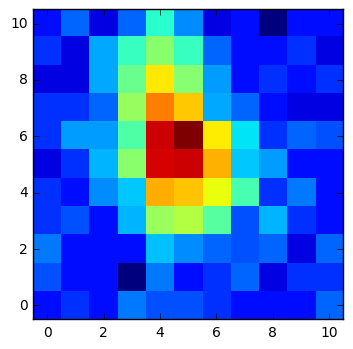

In [48]:
plt.imshow(tpf[1], origin='lower', interpolation='nearest')

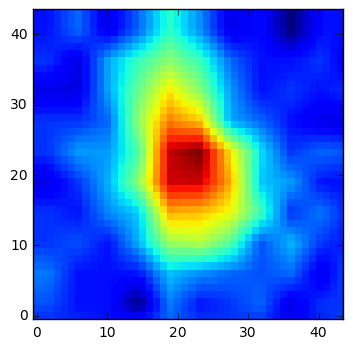

In [49]:
plt.imshow(super_tpf[1], origin='lower', interpolation='nearest')

In [50]:
mean_super_tpf = np.mean(super_tpf, axis=0)

In [51]:
mean_super_tpf.shape

(44, 44)

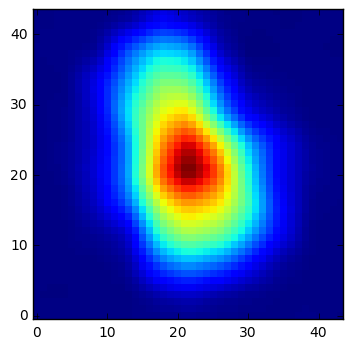

In [52]:
plt.imshow(mean_super_tpf, origin='lower', interpolation='nearest')

In [53]:
norm_super_tpf = mean_super_tpf / np.sum(mean_super_tpf)

In [58]:
detector = np.zeros((44,44))

In [59]:
np.sum(norm_super_tpf)

0.99999999999999989

In [60]:
def model_prime(f, dy, dx, template):
    interp_again = RectBivariateSpline(xp, yp, template, kx=1, ky=1)
    return f * interp_again(yp - dy, xp - dx) + detector

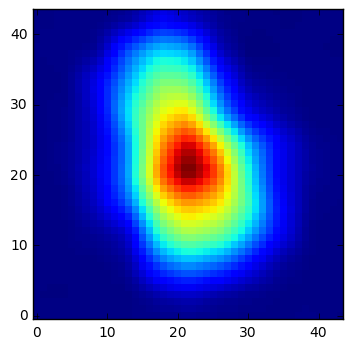

In [61]:
plt.imshow(model_prime(10, 0, 0, norm_super_tpf), origin='lower', interpolation='nearest')

In [62]:
np.sum(model_prime(10, 0, 0, norm_super_tpf))

10.0

In [63]:
def model(f, dy, dx, template):
    tmp = model_prime(f, dy, dx, template).reshape(11, 4, 11, 4)
    return np.sum(tmp, axis=(1, 3))

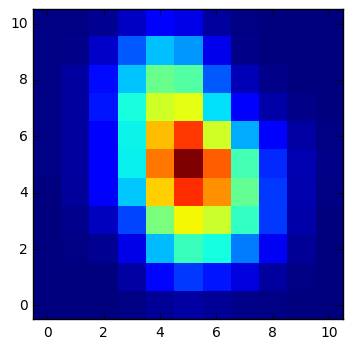

In [65]:
plt.imshow(model(10, 0, 0, norm_super_tpf), origin='lower', interpolation='nearest')

In [66]:
np.sum(model(10, 0, 0, norm_super_tpf))

9.9999999999999982

In [67]:
detector = np.zeros((44, 44))

In [68]:
data = tpf[0]

In [69]:
class lnlikelihood:
    def __init__(self, data):
        self.data = data
        
    def evaluate(self, p, template):
        f, dy, dx = p
        r = model(f, dy, dx, template) - self.data
        return np.sum(r * r)

In [70]:
from scipy.optimize import minimize

In [71]:
logL = lnlikelihood(data=tpf[0])

In [72]:
result = minimize(logL.evaluate, x0=(np.log(1e4), 0, 0), args=(norm_super_tpf), method='Powell')

In [73]:
result

   direc: array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])
     fun: 28.111376108588132
 message: 'Optimization terminated successfully.'
    nfev: 127
     nit: 3
  status: 0
 success: True
       x: array([  2.76547045e+02,   5.16624053e-01,  -2.32558154e-01])

In [74]:
f_n, yc_n, xc_n = result.x

In [75]:
xc[0] - 255.5

-0.27898526177418148

In [76]:
yc[0] - 205.5

0.52771256489054963

In [77]:
model_ = model(2.70604321e+02,   4.16538844e-01,  -1.82696234e-01, norm_super_tpf)

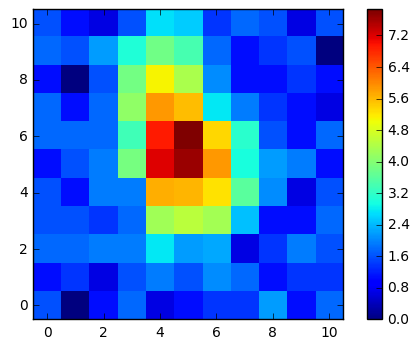

In [78]:
plt.imshow(tpf[0], origin='lower', interpolation='nearest')
plt.colorbar()

In [79]:
np.sum(tpf[0])

272.01587514621332

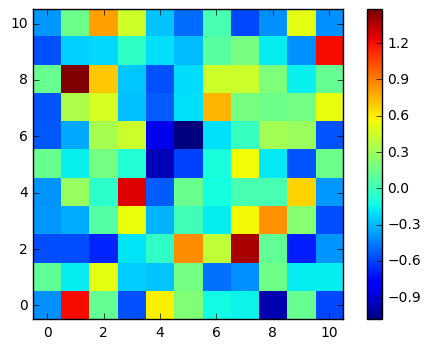

In [80]:
plt.imshow(model_ - tpf[0], origin='lower', interpolation='nearest')
plt.colorbar()

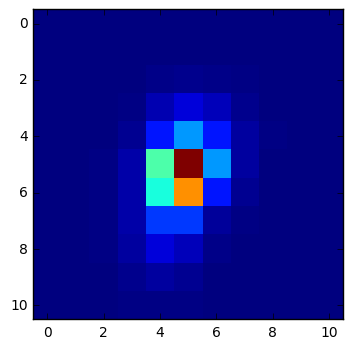

In [82]:
plt.imshow(np.exp(model_), interpolation='nearest')

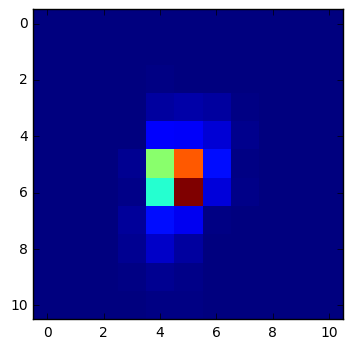

In [83]:
plt.imshow(np.exp(tpf[0]), interpolation='nearest')

In [84]:
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [85]:
interp_ = RectBivariateSpline(x, y, model_ - tpf[0], kx=1, ky=1)

In [86]:
dlnlike_dd = 2 * interp_(yp, xp)

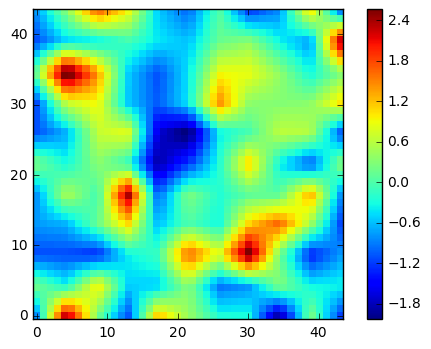

In [88]:
plt.imshow(dlnlike_dd, origin='lower', interpolation='nearest')
plt.colorbar()

In [89]:
dlnlike_dd.shape

(44, 44)

In [90]:
f_n

276.54704459900853

In [91]:
dlnlike_ds = f_n * 2 * interp_(yp - yc_n, xp - xc_n)

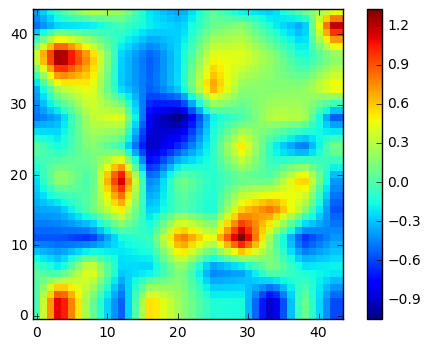

In [92]:
plt.imshow(interp_(yp - yc_n, xp - xc_n), origin='lower', interpolation='nearest')
plt.colorbar()

In [93]:
dlnlike_ds.shape

(44, 44)

In [94]:
tmp_s = np.copy(norm_super_tpf)

In [95]:
logL = lnlikelihood(data=tpf[0])

In [96]:
f_n, yc_n, xc_n

(276.54704459900853, 0.51662405338531014, -0.23255815424477974)

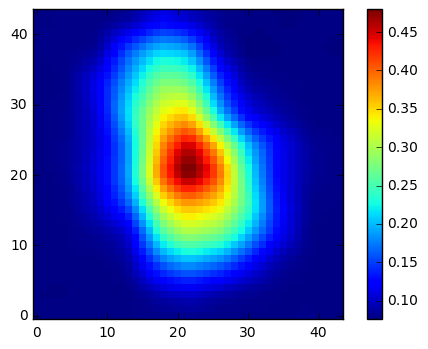

In [120]:
plt.imshow(f_n * tmp_s, origin='lower', interpolation='nearest')
plt.colorbar()

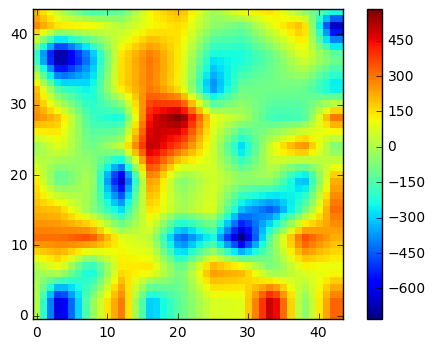

In [99]:
plt.imshow(-dlnlike_ds, origin='lower', interpolation='nearest')
plt.colorbar()

In [100]:
def gradient_descent(arg_template, p):
    f_n, yc_n, xc_n = p
    i = 0
    c = 1e-9
    tmp_s = arg_template
    interp_ = RectBivariateSpline(x, y, model(f_n, yc_n, xc_n, tmp_s) - tpf[0], kx=1, ky=1)
    dlnlike_ds = f_n * 2 * interp_(yp - yc_n, xp - xc_n)
    while i < 2000:
        logL_before = lnlikelihood(data=tpf[0]).evaluate((f_n, yc_n, xc_n), tmp_s)
        tmp_s = tmp_s - c * dlnlike_ds
        logL_after = lnlikelihood(data=tpf[0]).evaluate((f_n, yc_n, xc_n), tmp_s)
        interp_ = RectBivariateSpline(x, y, model(f_n, yc_n, xc_n, tmp_s) - tpf[0], kx=1, ky=1)
        dlnlike_ds = f_n * 2 * interp_(yp - yc_n, xp - xc_n)
        if logL_after < logL_before:
            c *= 1.1
        else:
            c *= .5
        if abs(logL_after - logL_before) < 1e-4:
            break
        print(logL_after)
        print(np.mean(dlnlike_ds), np.std(dlnlike_ds))
        i += 1
    return tmp_s

In [117]:
gd = gradient_descent(tmp_s, result.x)

36.2372411208
42.9548375483 236.447261555
36.1213159231
42.7997750127 235.975451332
35.9943554372
42.629750489 235.45779467
35.8553698555
42.4433800685 234.889983091
35.7032932027
42.2391643768 234.267333922
35.5369801671
42.0154816285 233.584764333
35.3552034398
41.770580884 232.836765045
35.1566517531
41.5025756963 232.017374105
34.9399288457
41.2094383806 231.120151233
34.7035536266
40.8889951952 230.138153398
34.4459618563
40.538922786 229.063912441
34.1655097168
40.1567463246 227.88941574
33.860479697
39.739839851 226.606091167
33.529089276
39.2854294345 225.204797838
33.1695029479
38.7905998742 223.675824437
32.7798481804
38.2523057797 222.008897295
32.3582359478
37.6673880083 220.193200718
31.9027865102
37.0325965691 218.217412542
31.4116611147
36.3446212494 216.069758328
30.8831002755
35.6001313566 213.738088065
30.3154692144
34.7958260938 211.209979797
29.707310916
33.9284971868 208.472875
29.0574070415
32.9951054365 205.514250992
28.364846643
31.9928728573 202.32183595
27.629

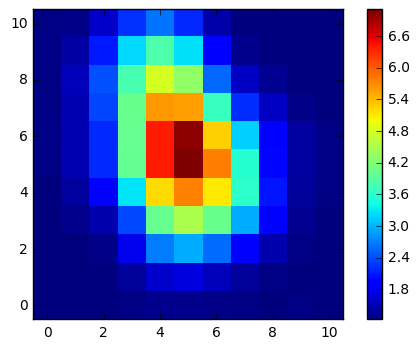

In [118]:
plt.imshow(model(f_n, yc_n, xc_n, tmp_s), origin='lower', interpolation='nearest')
plt.colorbar()

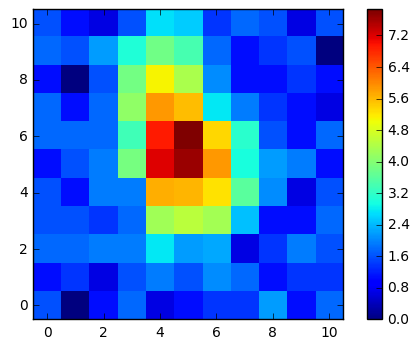

In [119]:
plt.imshow(tpf[0], origin='lower', interpolation='nearest')
plt.colorbar()

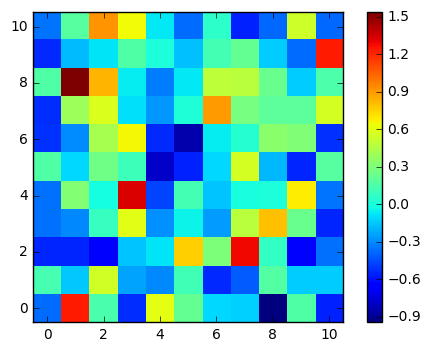

In [104]:
plt.imshow(model(f_n, yc_n, xc_n, tmp_s) - tpf[0], origin='lower', interpolation='nearest')
plt.colorbar()

In [105]:
interp_again = RectBivariateSpline(xp, yp, tmp_s, kx=1, ky=1)

In [115]:
logL = lnlikelihood(data=tpf[0])
result = minimize(logL.evaluate, x0=(result.x), args=(gd), method='Powell')

In [116]:
result.x

array([  2.78337628e+02,   1.61677038e-01,  -6.88914786e-02])

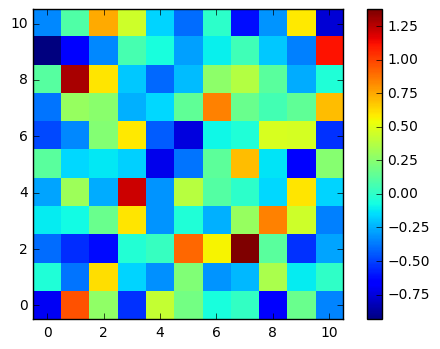

In [108]:
plt.imshow(model(*result.x, gd) - tpf[0], origin='lower', interpolation='nearest')
plt.colorbar()

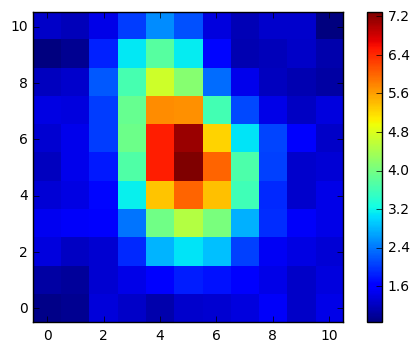

In [109]:
plt.imshow(model(*result.x, gd), origin='lower', interpolation='nearest')
plt.colorbar()